**Growing Neural Gas**

---

Thomas Martinetz, Klaus Schulten A "neural gas" network learns topologies., Artificial Neural Networks. Elsevier. 1991, pp. 397–402.   
http://www.ks.uiuc.edu/Publications/Papers/PDF/MART91B/MART91B.pdf

Bernd Fritzke  A Growing Neural Gas Network Learns Topologies.    
https://proceedings.neurips.cc/paper/1994/file/d56b9fc4b0f1be8871f5e1c40c0067e7-Paper.pdf


Нестандартная кластеризация 5: Growing Neural Gas.
https://habr.com/ru/post/340360/
    
    
Расширяющийся нейронный газ.
https://habr.com/ru/post/544094/    

https://github.com/Siarshai/MicroGrowingNeuralGas

https://demogng.de/js/demogng.html?model=NG&showAutoRestart

---

https://github.com/itdxer/neupy/blob/master/notebooks/growing-neural-gas/Growing%20Neural%20Gas%20animated.ipynb

In [1]:
# !pip install neupy

In [2]:
import matplotlib.pyplot as plt

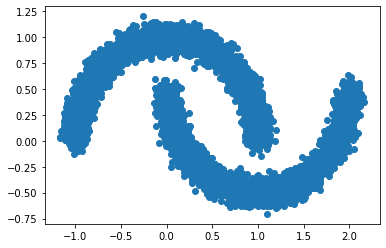

In [3]:
from sklearn.datasets import make_moons
data, _ = make_moons(10000, noise=0.06, random_state=0)
plt.scatter(*data.T)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [10]:
from neupy import algorithms
from neupy import utils
# from neupy.utils.misc import reproducible

In [14]:
# utils.misc.reproducible()

gng = algorithms.GrowingNeuralGas(
    n_inputs=2,
    n_start_nodes=2,

    shuffle_data=True,
    verbose=False,
    
    step=0.1,
    neighbour_step=0.001,
    
    max_edge_age=50,
    max_nodes=100,
    
    n_iter_before_neuron_added=100,
    after_split_error_decay_rate=0.5,
    error_decay_rate=0.995,
    min_distance_for_update=0.2,
)

In [5]:
from IPython.display import HTML
from tqdm import tqdm
# from tqdm import tqdm_notebook as tqdm
# from tqdm.notebook import tqdm

<ipython-input-15-69645e77c194>:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  anim = animation.FuncAnimation(fig, animate, tqdm(np.arange(220)), interval=30, blit=True)


  0%|          | 0/220 [00:00<?, ?it/s]

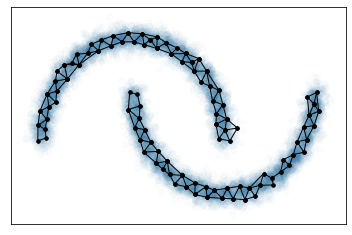

In [15]:
fig = plt.figure()
plt.scatter(*data.T, alpha=0.02)
plt.xticks([], [])
plt.yticks([], [])

def animate(i):
    for line in animate.prev_lines:
        line.remove()
        
    # Training will slow down overtime and we increase number
    # of data samples for training
    n = int(0.5 * gng.n_iter_before_neuron_added * (1 + i // 100))
    
    sampled_data_ids = np.random.choice(len(data), n)
    sampled_data = data[sampled_data_ids, :]
    gng.train(sampled_data, epochs=1)
    
    lines = []
    for node_1, node_2 in gng.graph.edges:
        weights = np.concatenate([node_1.weight, node_2.weight])
        line, = plt.plot(*weights.T, color='black')

        plt.setp(line, linewidth=1, color='black')
        
        lines.append(line)
        lines.append(plt.scatter(*weights.T, color='black', s=10))
    
    animate.prev_lines = lines
    return lines

animate.prev_lines = []
anim = animation.FuncAnimation(fig, animate, tqdm(np.arange(220)), interval=30, blit=True)
HTML(anim.to_html5_video())